# 图像直方图

图像直方图是图像像素值的统计学特征、计算代价较小，具有图像平移、旋转、缩放不变性等众多优点，广泛地应用于图像处理的各个领域，特别是灰度图像的阈值分割、基于颜色的图像检索以及图像分类、反向投影跟踪。常见的分为
- 灰度直方图
- 颜色直方图

对于图像上的每个像素点的像素值都在0~255之间，所以一张图像上的像素值出现频率也不一样，把这些信息统计出来就形成了直方图。

x轴表示像素的取值范围，bins，默认是256，也可以是16、32、48等

y轴表示bins在图像中出现的频率

图像直方图的优点：
- 不会受图像旋转影响
- 不会受放大缩小影响

图像直方图可以用二值分割，如下图，将两个bins出现频率最高的顶点中间最低的谷作为二值分割点

![](images/bins.jpg)

## 自定义直方图

/Users/zdf/Code/StudyOpenCV/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zdf/Code/StudyOpenCV/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zdf/Code/StudyOpenCV/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zdf/Code/StudyOpenCV/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zdf/Code/StudyOpenCV/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zdf/Code/StudyOpenCV/venv/li

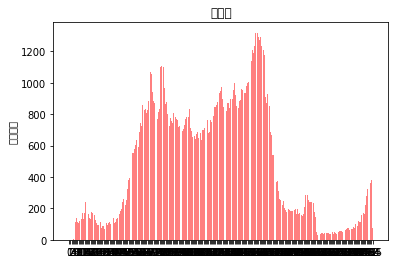

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def custom_hist(gray):
    h, w = gray.shape
    hist = np.zeros([256], dtype=np.int32)
    # 遍历每个像素点，统计值出现的次数
    for row in range(h):
        for col in range(w):
            pv = gray[row, col]
            hist[pv] += 1

    y_pos = np.arange(0, 256, 1, dtype=np.int32)
    plt.bar(y_pos, hist, align='center', color='r', alpha=0.5)
    plt.xticks(y_pos, y_pos)
    plt.ylabel('出现频率')
    plt.title('直方图')
    plt.show()

src = cv.imread('images/flower.png')
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
custom_hist(gray)

## `calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist` 计算直方图

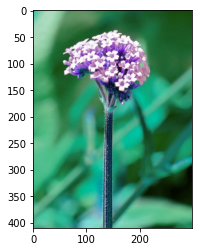

In [3]:
plt.imshow(src)

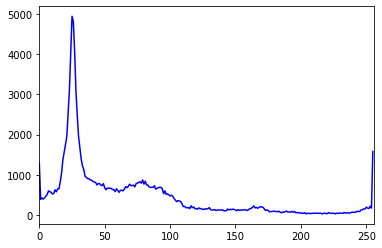

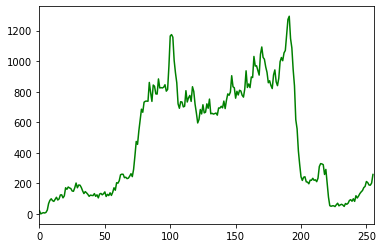

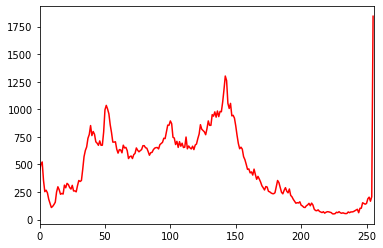

In [4]:
color = ('blue', 'green', 'red')
for i ,c in enumerate(color):
    hist = cv.calcHist([src], [i], None, [256], [0, 256])
    plt.plot(hist, color=c)
    plt.xlim([0, 256])
    plt.show()


